In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df['target_names'] = df.target.apply(lambda x : iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [5]:
km = KMeans(n_clusters=3, random_state=42)
cluster = km.fit_predict(iris.data)
centroid = km.cluster_centers_
centroid

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [6]:
df['cluster'] = cluster
df['cluster_names'] = df.cluster.apply(lambda x : iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,cluster,cluster_names
0,5.1,3.5,1.4,0.2,0,setosa,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa,1,versicolor
2,4.7,3.2,1.3,0.2,0,setosa,1,versicolor
3,4.6,3.1,1.5,0.2,0,setosa,1,versicolor
4,5.0,3.6,1.4,0.2,0,setosa,1,versicolor
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica,0,setosa
147,6.5,3.0,5.2,2.0,2,virginica,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica,2,virginica


In [7]:
df_target_0 = df[df.target==0]
df_target_1 = df[df.target==1]
df_target_2 = df[df.target==2]

df_cluster_0 = df[df.cluster==0]
df_cluster_1 = df[df.cluster==1]
df_cluster_2 = df[df.cluster==2]

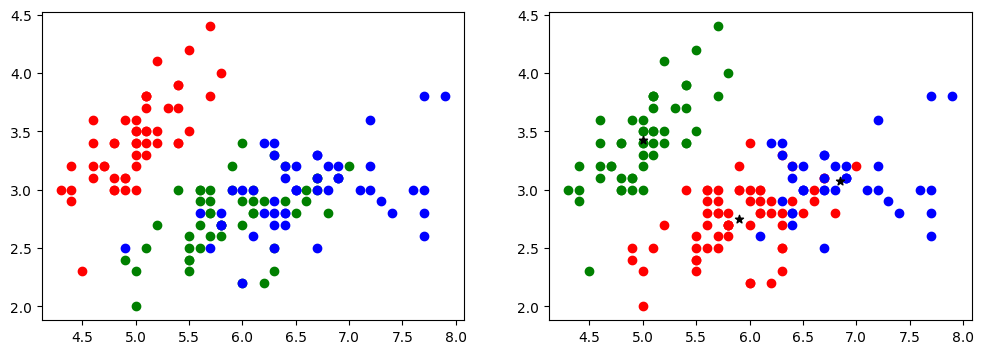

In [8]:
fig1, (sub1, sub2) = plt.subplots(nrows=1, ncols=2,figsize=(12,4))

for df, color in zip([df_target_0, df_target_1, df_target_2], ['red', 'green', 'blue']):
    sub1.scatter(df['sepal length (cm)'], df['sepal width (cm)'], color=color)

for df, color in zip([df_cluster_0, df_cluster_1, df_cluster_2], ['red', 'green', 'blue']):
    sub2.scatter(df['sepal length (cm)'], df['sepal width (cm)'], color=color)
sub2.scatter(centroid[:, 0], centroid[:, 1], color='black', marker='*')

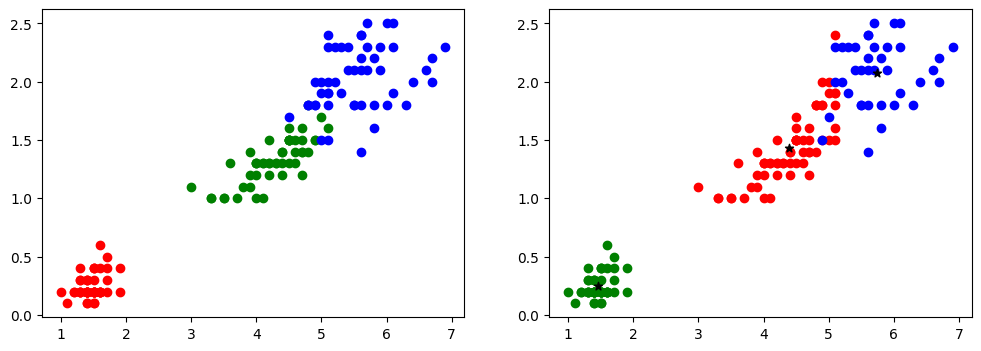

In [9]:
fig2, (sub1, sub2) = plt.subplots(ncols=2, figsize=(12, 4))
for df, color in zip([df_target_0, df_target_1, df_target_2], ['red', 'green', 'blue']):
    sub1.scatter(df['petal length (cm)'], df['petal width (cm)'], color=color)

for df, color in zip([df_cluster_0, df_cluster_1, df_cluster_2], ['red', 'green', 'blue']):
    sub2.scatter(df['petal length (cm)'], df['petal width (cm)'], color=color)
sub2.scatter(centroid[:, 2], centroid[:, 3], color='black', marker='*')

Text(0, 0.5, 'Sum of Squared Error')

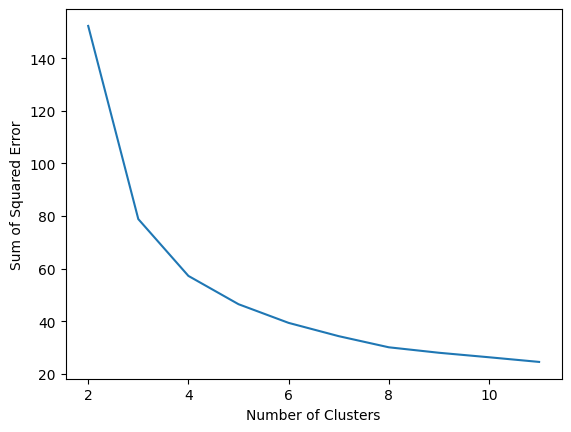

In [10]:
variances = []  # sum of squared error
n_clusters = range(2,12)
for i in n_clusters:
    km = KMeans(n_clusters=i)
    km.fit(iris.data)
    variances.append(km.inertia_)  # inertia_ is sum of squared error

plt.plot(n_clusters, variances)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')